In [1]:
import sys
import sklearn

In [4]:
def generate_country_statistics(bli_data, gdp_data):
    # Filter hanya data dengan ketimpangan total
    bli_filtered = bli_data[bli_data["INEQUALITY"] == "TOT"]

    # Ubah format data agar 'Indicator' menjadi kolom
    bli_pivot = bli_filtered.pivot(index="Country", columns="Indicator", values="Value")

    # Rename kolom GDP dan jadikan 'Country' sebagai index
    gdp_data = gdp_data.rename(columns={"2015": "GDP per capita"}).set_index("Country")

    # Gabungkan kedua dataset berdasarkan index (Country)
    country_stats = pd.merge(bli_pivot, gdp_data, left_index=True, right_index=True)

    # Urutkan berdasarkan GDP per capita
    country_stats = country_stats.sort_values(by="GDP per capita")

    # Tentukan index yang ingin dihapus dan sisakan yang lain
    excluded_indices = {0, 1, 6, 8, 33, 34, 35}
    included_indices = [i for i in range(36) if i not in excluded_indices]

    # Ambil kolom yang relevan dan baris yang disaring
    selected_stats = country_stats.loc[country_stats.index[included_indices],
                                       ["GDP per capita", "Life satisfaction"]]
    return selected_stats


In [5]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [6]:
# Supaya plot langsung tampil di notebook
%matplotlib inline

# Import dan konfigurasi matplotlib untuk tampilan yang lebih enak dibaca
import matplotlib as mpl

# Set ukuran label untuk axis
mpl.rcParams['axes.labelsize'] = 14
# Set ukuran label untuk ticks di sumbu x dan y
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


In [7]:
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

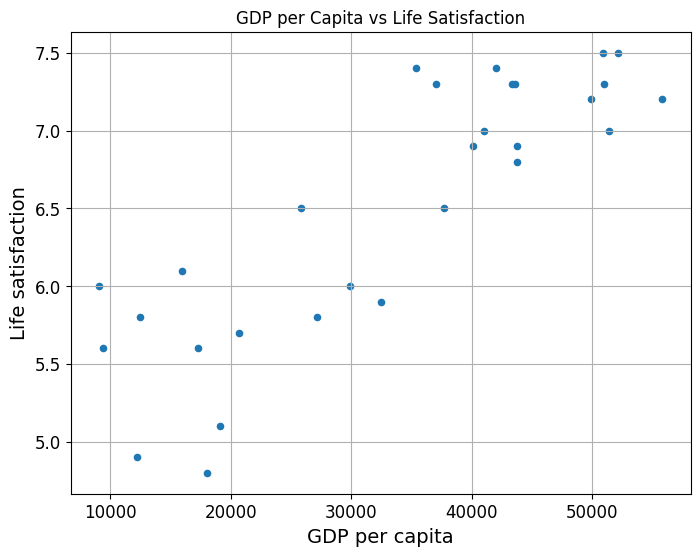

Predicted Life Satisfaction for Cyprus (GDP per capita = 22587): 5.96


In [8]:
# Import library yang dibutuhkan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load dataset
oecd_df = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_df = pd.read_csv(datapath + "gdp_per_capita.csv",
                     thousands=',', delimiter='\t',
                     encoding='latin1', na_values="n/a")

# Siapkan data untuk analisis
stats_df = generate_country_statistics(oecd_df, gdp_df)

# Definisikan variabel independen (X) dan dependen (y)
X = stats_df[["GDP per capita"]].values
y = stats_df[["Life satisfaction"]].values

# Visualisasi scatter plot hubungan GDP per capita vs Life satisfaction
stats_df.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(8,6))
plt.title("GDP per Capita vs Life Satisfaction")
plt.grid(True)
plt.show()

# Buat model regresi linear
lin_reg = LinearRegression()

# Latih model dengan data yang sudah disiapkan
lin_reg.fit(X, y)

# Prediksi Life satisfaction untuk GDP per capita Cyprus
cyprus_gdp = np.array([[22587]])
predicted_life_satisfaction = lin_reg.predict(cyprus_gdp)

# Tampilkan hasil prediksi
print(f"Predicted Life Satisfaction for Cyprus (GDP per capita = 22587): {predicted_life_satisfaction[0,0]:.2f}")


In [9]:
# Import K-Nearest Neighbors Regressor dari sklearn
from sklearn.neighbors import KNeighborsRegressor

# Inisialisasi model KNN dengan 3 tetangga terdekat
knn_reg = KNeighborsRegressor(n_neighbors=3)

# Latih model dengan data
knn_reg.fit(X, y)

# Prediksi Life Satisfaction untuk GDP per capita Cyprus
knn_prediction = knn_reg.predict(cyprus_gdp)

# Tampilkan hasil prediksi
print(f"KNN Prediction (3 Neighbors) for Cyprus: {knn_prediction[0,0]:.2f}")


KNN Prediction (3 Neighbors) for Cyprus: 5.77


In [10]:
# Tentukan folder untuk menyimpan gambar
ROOT_DIR = "."
CHAPTER_NAME = "fundamentals"
FIGURES_DIR = os.path.join(ROOT_DIR, "images", CHAPTER_NAME)

# Buat folder jika belum ada
os.makedirs(FIGURES_DIR, exist_ok=True)

# Fungsi untuk menyimpan figure
def export_figure(fig_name, tight_layout=True, extension="png", dpi=300):
    file_path = os.path.join(FIGURES_DIR, f"{fig_name}.{extension}")
    print(f"Saving figure: {file_path}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(file_path, format=extension, dpi=dpi)


In [11]:
np.random.seed(42)

In [16]:
# Load dataset OECD BLI
oecd_raw = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')

# Filter hanya yang INEQUALITY = 'TOT'
oecd_filtered = oecd_raw.query("INEQUALITY == 'TOT'")

# Pivot data: ubah 'Indicator' jadi kolom
oecd_pivot = oecd_filtered.pivot(index="Country", columns="Indicator", values="Value")

# Tampilkan 2 baris pertama
oecd_pivot.head(2)


Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [18]:
oecd_pivot["Life satisfaction"].head()

,Life satisfaction
Country,
Australia,7.3
Austria,6.9
Belgium,6.9
Brazil,7.0
Canada,7.3


In [19]:
# Load dataset GDP per capita
gdp_df = pd.read_csv(
    datapath + "gdp_per_capita.csv",
    thousands=',',
    delimiter='\t',
    encoding='latin1',
    na_values="n/a"
)

# Rename kolom untuk tahun 2015 → "GDP per capita"
gdp_df = gdp_df.rename(columns={"2015": "GDP per capita"})

# Set index ke 'Country'
gdp_df = gdp_df.set_index("Country")

# Tampilkan 2 data teratas
gdp_df.head(2)


,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [22]:
# Gabungkan data OECD dan GDP berdasarkan index (Country)
combined_stats = pd.merge(
    left=oecd_pivot,
    right=gdp_df,
    left_index=True,
    right_index=True
)

# Urutkan berdasarkan 'GDP per capita'
combined_stats = combined_stats.sort_values(by="GDP per capita")

# Tampilkan dataframe hasil gabungan
combined_stats


,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [23]:
# Ambil data 'GDP per capita' dan 'Life satisfaction' untuk United States
us_stats = combined_stats.loc["United States", ["GDP per capita", "Life satisfaction"]]

# Tampilkan hasil
us_stats


,United States
GDP per capita,55805.204
Life satisfaction,7.2


In [26]:
# Tentukan indeks data yang ingin dikeluarkan
excluded_idx = [0, 1, 6, 8, 33, 34, 35]

# Hitung indeks yang akan dipakai (sisanya)
included_idx = [i for i in range(36) if i not in excluded_idx]

# Buat subset data yang akan digunakan untuk training
train_data = combined_stats[["GDP per capita", "Life satisfaction"]].iloc[included_idx]

# Buat subset data yang tidak digunakan (misalnya untuk analisis lebih lanjut)
excluded_data = combined_stats[["GDP per capita", "Life satisfaction"]].iloc[excluded_idx]


Saving figure: ./images/fundamentals/money_happy_scatterplot.png


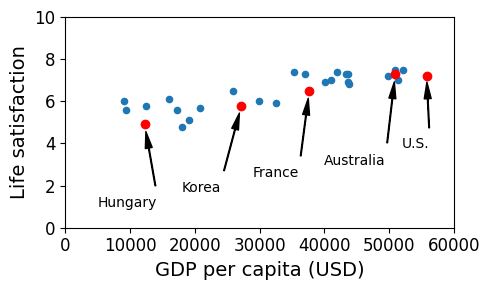

In [27]:
# Visualisasi scatterplot: GDP per capita vs Life satisfaction
train_data.plot(
    kind='scatter',
    x="GDP per capita",
    y="Life satisfaction",
    figsize=(5, 3)
)

# Atur sumbu X dan Y
plt.axis([0, 60000, 0, 10])

# Tentukan posisi teks untuk beberapa negara
annotate_positions = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}

# Tambahkan anotasi dan tanda merah pada negara terpilih
for country, text_pos in annotate_positions.items():
    gdp_value, life_score = train_data.loc[country]
    label = "U.S." if country == "United States" else country

    plt.annotate(
        label,
        xy=(gdp_value, life_score),
        xytext=text_pos,
        arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5)
    )

    plt.plot(gdp_value, life_score, "ro")

# Label sumbu X
plt.xlabel("GDP per capita (USD)")

# Simpan figure
export_figure("money_happy_scatterplot")

# Tampilkan plot
plt.show()


In [29]:
# Simpan train_data ke CSV
output_path = os.path.join("datasets", "lifesat", "lifesat.csv")

# Pastikan folder ada (kalau belum, buat dulu)
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Simpan CSV
train_data.to_csv(output_path)

print(f"Data berhasil disimpan di: {output_path}")


Data berhasil disimpan di: datasets/lifesat/lifesat.csv


In [30]:
train_data.loc[list(annotate_positions.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


Saving figure: ./images/fundamentals/tweaking_model_params_plot.png


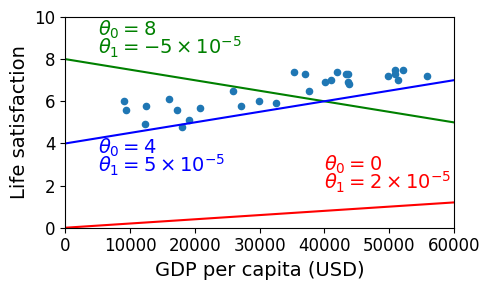

In [31]:
import numpy as np

train_data.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(5, 3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])

X_range = np.linspace(0, 60000, 1000)

plt.plot(X_range, 2 * X_range / 100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")

plt.plot(X_range, 8 - 5 * X_range / 100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")

plt.plot(X_range, 4 + 5 * X_range / 100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")

export_figure("tweaking_model_params_plot")
plt.show()


In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
X_sample = np.c_[train_data["GDP per capita"]]
y_sample = np.c_[train_data["Life satisfaction"]]

lin_reg.fit(X_sample, y_sample)

theta_0, theta_1 = lin_reg.intercept_[0], lin_reg.coef_[0][0]
theta_0, theta_1


(np.float64(4.853052800266436), np.float64(4.911544589158484e-05))

Saving figure: ./images/fundamentals/best_fit_model_plot.png


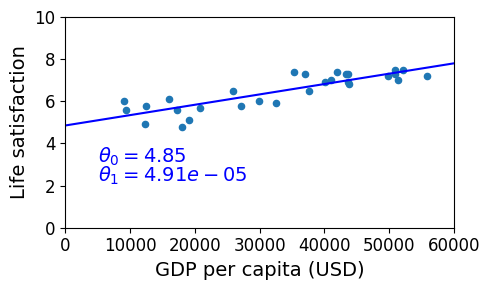

In [33]:
train_data.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(5, 3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])

X_range = np.linspace(0, 60000, 1000)
plt.plot(X_range, theta_0 + theta_1 * X_range, "b")

plt.text(5000, 3.1, rf"$\theta_0 = {theta_0:.2f}$", fontsize=14, color="b")
plt.text(5000, 2.2, rf"$\theta_1 = {theta_1:.2e}$", fontsize=14, color="b")

export_figure("best_fit_model_plot")
plt.show()


In [34]:
cyprus_gdp_value = gdp_df.loc["Cyprus", "GDP per capita"]
print(cyprus_gdp_value)

cyprus_predicted_life_sat = lin_reg.predict([[cyprus_gdp_value]])[0, 0]
cyprus_predicted_life_sat


22587.49


np.float64(5.96244744318815)

Saving figure: ./images/fundamentals/cyprus_prediction_plot.png


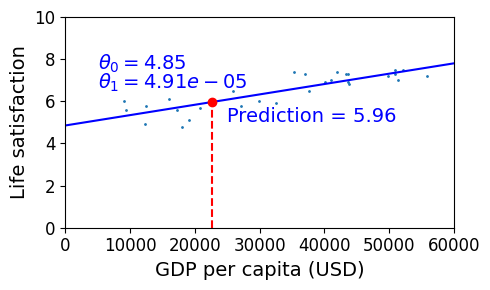

In [35]:
train_data.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(5, 3), s=1)
plt.xlabel("GDP per capita (USD)")

X_range = np.linspace(0, 60000, 1000)
plt.plot(X_range, theta_0 + theta_1 * X_range, "b")

plt.axis([0, 60000, 0, 10])

plt.text(5000, 7.5, rf"$\theta_0 = {theta_0:.2f}$", fontsize=14, color="b")
plt.text(5000, 6.6, rf"$\theta_1 = {theta_1:.2e}$", fontsize=14, color="b")

plt.plot(
    [cyprus_gdp_value, cyprus_gdp_value],
    [0, cyprus_predicted_life_sat],
    "r--"
)

plt.text(25000, 5.0, rf"Prediction = {cyprus_predicted_life_sat:.2f}", fontsize=14, color="b")
plt.plot(cyprus_gdp_value, cyprus_predicted_life_sat, "ro")

export_figure("cyprus_prediction_plot")
plt.show()


In [38]:
train_data[7:10]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [39]:
# Simpan salinan data mentah
backup_data = oecd_raw, gdp_df

# Fungsi untuk mempersiapkan data negara
def generate_country_statistics(oecd_data, gdp_data):
    oecd_data = oecd_data[oecd_data["INEQUALITY"] == "TOT"]
    oecd_data = oecd_data.pivot(index="Country", columns="Indicator", values="Value")

    gdp_data = gdp_data.rename(columns={"2015": "GDP per capita"}).set_index("Country")

    merged_stats = pd.merge(oecd_data, gdp_data, left_index=True, right_index=True)
    merged_stats = merged_stats.sort_values(by="GDP per capita")

    excluded_idx = [0, 1, 6, 8, 33, 34, 35]
    included_idx = [i for i in range(36) if i not in excluded_idx]

    return merged_stats[["GDP per capita", "Life satisfaction"]].iloc[included_idx]


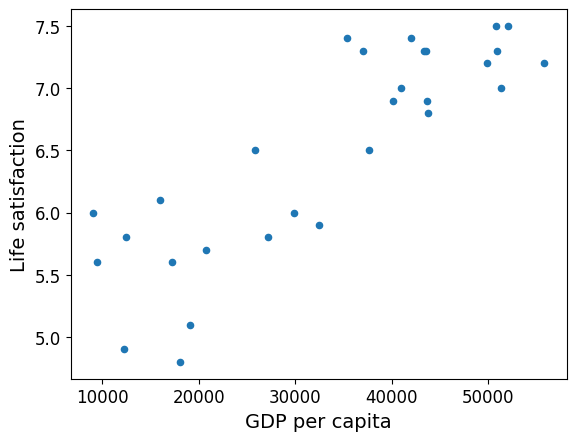

[[5.96242338]]


In [40]:
# Import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load dataset
oecd_df = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_df = pd.read_csv(
    datapath + "gdp_per_capita.csv",
    thousands=',',
    delimiter='\t',
    encoding='latin1',
    na_values="n/a"
)

# Siapkan data
country_stats = generate_country_statistics(oecd_df, gdp_df)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualisasi data
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

# Inisialisasi model regresi linear
lin_model = LinearRegression()

# Latih model
lin_model.fit(X, y)

# Prediksi untuk Cyprus
cyprus_gdp = [[22587]]
cyprus_pred = lin_model.predict(cyprus_gdp)
print(cyprus_pred)


In [42]:
oecd_raw, gdp_df = backup_data

In [44]:
excluded_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [45]:
annotate_positions2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}


Saving figure: ./images/fundamentals/representative_training_data_scatterplot.png


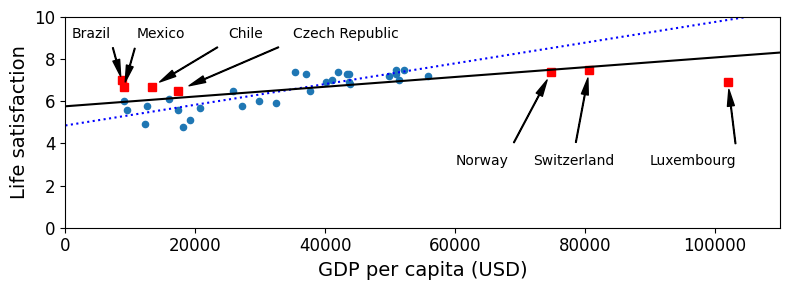

In [46]:
train_data.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(8, 3))
plt.axis([0, 110000, 0, 10])

for country, text_pos in annotate_positions2.items():
    gdp_val, life_sat = excluded_data.loc[country]
    plt.annotate(
        country,
        xy=(gdp_val, life_sat),
        xytext=text_pos,
        arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5)
    )
    plt.plot(gdp_val, life_sat, "rs")

X_range = np.linspace(0, 110000, 1000)
plt.plot(X_range, theta_0 + theta_1 * X_range, "b:")

lin_reg_full = LinearRegression()
X_full = np.c_[combined_stats["GDP per capita"]]
y_full = np.c_[combined_stats["Life satisfaction"]]
lin_reg_full.fit(X_full, y_full)

theta_0_full, theta_1_full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
plt.plot(X_range, theta_0_full + theta_1_full * X_range, "k")
plt.xlabel("GDP per capita (USD)")

export_figure("representative_training_data_scatterplot")
plt.show()


Saving figure: ./images/fundamentals/overfitting_model_plot.png


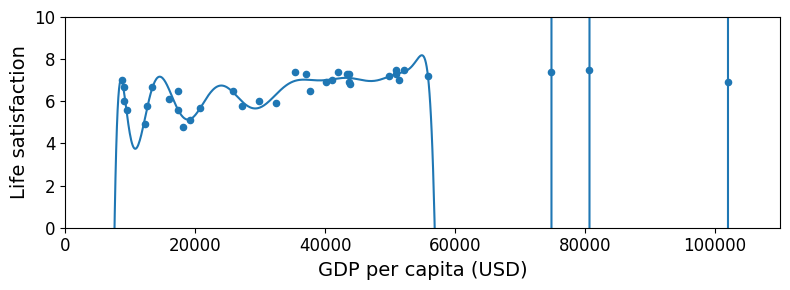

In [48]:
combined_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(8, 3))
plt.axis([0, 110000, 0, 10])

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

poly_features = PolynomialFeatures(degree=30, include_bias=False)
scaler = StandardScaler()
lin_reg_poly = LinearRegression()

poly_pipeline = Pipeline([
    ('poly_features', poly_features),
    ('scaler', scaler),
    ('linear_reg', lin_reg_poly)
])

poly_pipeline.fit(X_full, y_full)

poly_curve = poly_pipeline.predict(X_range[:, np.newaxis])
plt.plot(X_range, poly_curve)

plt.xlabel("GDP per capita (USD)")
export_figure("overfitting_model_plot")
plt.show()


In [49]:
combined_stats.loc[[country for country in combined_stats.index if "W" in country.upper()], "Life satisfaction"]


,Life satisfaction
Country,
New Zealand,7.3
Sweden,7.2
Norway,7.4
Switzerland,7.5


In [50]:
gdp_df.loc[[country for country in gdp_df.index if "W" in country.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


Saving figure: ./images/fundamentals/ridge_model_plot.png


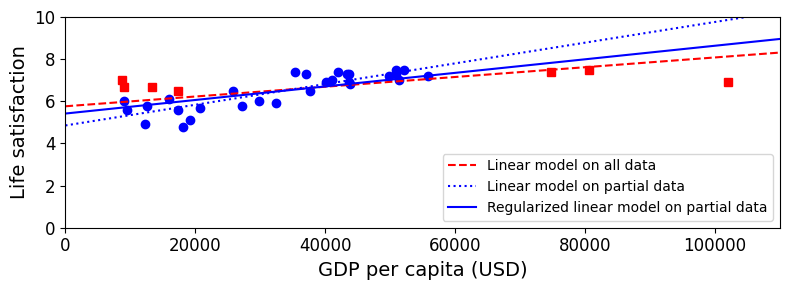

In [53]:
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 3))

plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")

plt.plot(train_data["GDP per capita"], train_data["Life satisfaction"], "bo")
plt.plot(excluded_data["GDP per capita"], excluded_data["Life satisfaction"], "rs")

X_range = np.linspace(0, 110000, 1000)
plt.plot(X_range, theta_0_full + theta_1_full * X_range, "r--", label="Linear model on all data")
plt.plot(X_range, theta_0 + theta_1 * X_range, "b:", label="Linear model on partial data")

# ridge_reg is not used here, remove or comment it out if unnecessary
# ridge_reg = LinearRegression()

ridge = linear_model.Ridge(alpha=10**9.5)
ridge.fit(X_sample, y_sample)

# Access intercept_ and coef_ directly as they are scalars for a single feature
theta_0_ridge = ridge.intercept_
theta_1_ridge = ridge.coef_[0] # Access the single element in the coef_ array

plt.plot(X_range, theta_0_ridge + theta_1_ridge * X_range, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")
export_figure("ridge_model_plot")
plt.show()

# **Chapter 1**
## **1. How would you define Machine Learning?**

Machine Learning adalah cabang dari kecerdasan buatan (AI) yang memungkinkan sistem untuk belajar dari data dan meningkatkan performanya tanpa diprogram secara eksplisit. Artinya, alih-alih menulis aturan satu per satu, kita memberikan data kepada algoritma sehingga ia bisa "belajar" pola dan membuat prediksi atau keputusan berdasarkan data tersebut.

## **2. Can you name four types of problems where it shines?**

Machine learning sangat baik digunakan untuk:
1. Deteksi penipuan (fraud detection)
2. Rekomendasi produk
3. Pengenalan gambar dan suara (image and speech recognition)

## **3. What is a labeled training set?**

Labeled training set adalah kumpulan data yang digunakan untuk melatih model Machine Learning, di mana setiap contoh (data) memiliki label atau jawaban yang benar. Misalnya, untuk klasifikasi email spam, setiap email memiliki label seperti “spam” atau “not spam”.

## **4. What are the two most common supervised tasks?**

Dua tugas paling umum dalam supervised learning adalah:

1. Classification  Memetakan input ke dalam kategori (contoh: apakah email ini spam atau bukan?)

2. Regression  Memprediksi nilai numerik berkelanjutan (contoh: berapa harga rumah berdasarkan fitur rumah tersebut?)

## **5. Can you name four common unsupervised tasks?**

Empat tugas umum dari unsupervised learning adalah:

1. Clustering: Mengelompokkan data yang mirip (contoh: segmentasi pelanggan)

2. Visualization: Memberikan gambaran dari hasil proses data

3. Dimensionality Reduction: Mengurangi jumlah fitur dalam data sambil menjaga informasi penting (contoh: PCA)

4. Association Rule Learning: Menemukan aturan asosiasi dalam data (contoh: orang yang beli roti biasanya beli susu)



## **6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?**
Untuk tugas seperti ini, Reinforcement Learning cocok banget! Karena robot harus belajar melalui trial and error dan mendapatkan feedback berupa reward (misalnya: bisa berjalan tanpa jatuh).


## **7. What type of algorithm would you use to segment your customers into multiple groups?**
Kita akan menggunakan Clustering yang merupakan bagian dari Unsupervised Learning. Algoritma populer untuk ini adalah K-Means atau DBSCAN.

## **8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?**
Ini adalah supervised learning karena kita melatih model dengan data yang sudah diberi label: email mana yang spam dan mana yang bukan.

## **9. What is an online learning system?**
Online learning system adalah sistem pembelajaran yang bisa belajar terus-menerus dari aliran data baru (streaming data). Data masuk sedikit demi sedikit dan model langsung diperbarui tanpa perlu dilatih ulang dari awal. Cocok untuk data real-time seperti harga saham atau sensor IoT.

## **10. What is out-of-core learning?**
Out-of-core learning adalah teknik melatih model dari data yang sangat besar yang tidak bisa dimuat sepenuhnya ke dalam memori (RAM). Caranya dengan membagi data menjadi batch kecil dan memprosesnya satu per satu. Library seperti Scikit-Learn menyediakan fitur partial_fit() untuk ini.


## **11. What type of learning algorithm relies on a similarity measure to make predictions?**
Ini adalah instance-based learning, seperti algoritma K-Nearest Neighbors (KNN). Algoritma ini menyimpan data training dan membuat prediksi berdasarkan kemiripan (misalnya menggunakan Euclidean distance atau cosine similarity).

## **12. What is the difference between a model parameter and a learning algorithms hyperparameter?**
Model parameters: Nilai yang dipelajari model dari data (contoh: koefisien pada regresi linear)

Hyperparameters: Nilai yang kita tentukan sebelum proses training dimulai (contoh: jumlah neighbor di KNN, learning rate di Gradient Descent)

## **13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?**
Model-based learning mencari model terbaik yang bisa memetakan input ke output. Strategi umum adalah meminimalkan loss function (seperti MSE atau cross-entropy) menggunakan teknik seperti Gradient Descent. Prediksi dilakukan dengan menerapkan model tersebut ke data baru.

## **14. Can you name four of the main challenges in Machine Learning?**
Empat tantangan utama:

Kurangnya data berkualitas tinggi

Data tidak representatif

Overfitting atau underfitting

Data bias atau noise


## **15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?**
Ini disebut overfitting. Solusinya bisa:

Mengumpulkan lebih banyak data training

Menyederhanakan model (misalnya kurangi jumlah layer/neuron di neural network)

Gunakan regularisasi seperti L1/L2 atau teknik dropout

## **16. What is a test set, and why would you want to use it?**
Test set adalah kumpulan data yang tidak digunakan saat training, digunakan untuk mengukur performa akhir model pada data yang benar-benar baru. Tujuannya untuk menguji seberapa baik model bisa generalisasi.

## **17. What is the purpose of a validation set?**
Validation set digunakan untuk mengatur hyperparameter dan memilih model terbaik selama training. Kita tidak boleh mengintip test set saat tuning, jadi kita pakai validation set sebagai alat evaluasi sementara.


## **18. What is the train-dev set, when do you need it, and how do you use it?**
Train-dev set adalah subset dari training data yang digunakan untuk debugging model, terutama saat hasil di validation/test buruk. Kita gunakan ini kalau performa model di training bagus, tapi validation jelek, untuk memastikan apakah masalahnya di overfitting atau ada bug dalam training pipeline.

## **19. What can go wrong if you tune hyperparameters using the test set?**
Kalau hyperparameter dituning pakai test set, maka test set sudah "tercemar" dan tidak lagi bisa merepresentasikan data baru yang belum pernah dilihat. Ini akan menyebabkan overfitting terhadap test set dan hasil evaluasi tidak jujur/realistis.
